In [1]:
%load_ext autoreload

%env CUDA_VISIBLE_DEVICES = 3 python EfficientNet.ipynb

import torch.nn.functional as F
from torch import nn
import torch
from torch.optim import Adam
import torchvision

import math

from loading_dataset import load_imagenette
from model_learning import Train
from EfficientBlock import EfficientNet
from SEBlock import SE_Block

env: CUDA_VISIBLE_DEVICES=3 python EfficientNet.ipynb


In [2]:
NUM_EPOCHS = 30
LEARNING_RATE = 0.001
DEVICE = 'cuda'

In [3]:
train_loader, val_loader, test_loader, test_dataset = load_imagenette()

In [4]:
# b0 version by default, but it can be changed by varying width_factor and depth_factor
model = EfficientNet()
model = model.to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=LEARNING_RATE)

In [5]:
# In pytorch - EfficientNet B0 parameters: 5288548
print('parameters:', sum(param.numel() for param in model.parameters()))

parameters: 4020358


In [6]:
learning = Train(model=model, loss_function=loss_function,
                 optimizer=optimizer, num_epochs=NUM_EPOCHS, train_loader=train_loader,
                 val_loader=val_loader, test_loader=test_loader, test_dataset=test_dataset,
                 device=DEVICE)

In [7]:
accuracy_test, f1_score_test = learning.train_procedure()

Epoch number is 1
Epoch number is 2
Epoch number is 3
Epoch number is 4
Epoch number is 5
Epoch number is 6
Epoch number is 7
Epoch number is 8
Epoch number is 9
Epoch number is 10
Epoch number is 11
Epoch number is 12
Epoch number is 13
Epoch number is 14
Epoch number is 15
Epoch number is 16
Epoch number is 17
Epoch number is 18
Epoch number is 19
Epoch number is 20
Epoch number is 21
Epoch number is 22
Epoch number is 23
Epoch number is 24
Epoch number is 25
Epoch number is 26
Epoch number is 27
Epoch number is 28
Epoch number is 29
Epoch number is 30


In [8]:
model_path = 'efficientnet_b0_model_imagenette320'
torch.save(model.state_dict(), model_path)

In [9]:
train_losses = learning.get_train_avg_loss()
valid_losses = learning.get_valid_avg_loss()
validation_accuracy = learning.get_valid_accuracy()

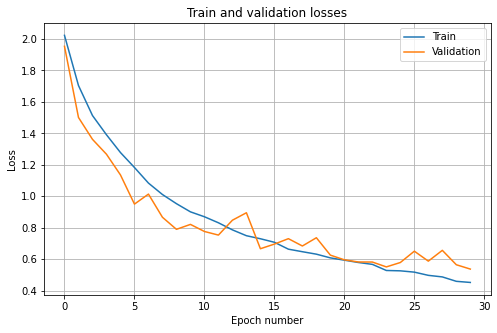

In [10]:
learning.plot_losses(train_losses=train_losses, valid_losses=valid_losses,
            fig_size_width=8, fig_size_height=5)

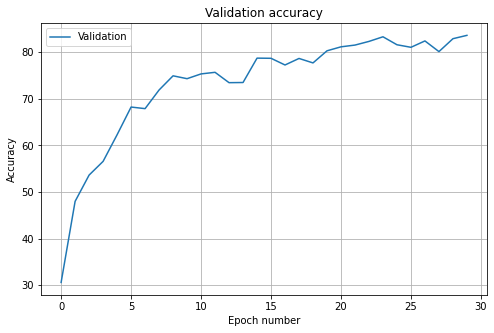

In [11]:
learning.plot_accuracy(validation_accuracy=validation_accuracy,
              fig_size_width=8, fig_size_height=5)

Test accuracy: 85.4 
F1-score: 1.0


<Figure size 1080x864 with 0 Axes>

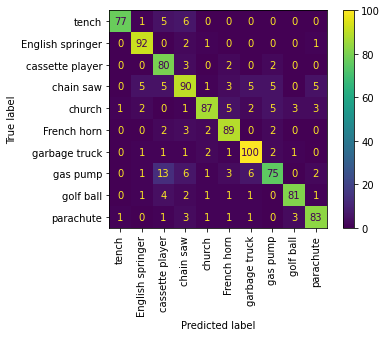

In [12]:
print(f'Test accuracy: {accuracy_test} \n' 
      f'F1-score: {f1_score_test}')

learning.plot_confusion_matrix(fig_size_width=15, fig_size_height=12)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: parachute


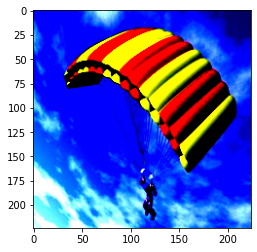

In [13]:
learning.predict_image(test_dataset[200][0])